# iFood CRM Data Analyst Case
Rafael Faria Castelão

---
# Part 2: Features Study

The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled.

The objective of this notebook is to understand the characteristic features of the customers willing to buy the new gadget.

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data
pilot_data = pd.read_csv('ml_project1_data.csv', index_col=0)

# Print information for dataset
print("Dataset contains: \n• {} training examples (rows)\n• {} features (columns)."
      .format(pilot_data.shape[0], pilot_data.shape[1]))

Dataset contains: 
• 2240 training examples (rows)
• 28 features (columns).


In [3]:
# Since data has 28 features let's set an option to display all features
pd.set_option('display.max_columns', 50)

In [4]:
# Print a sample of the data
pilot_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In part 1 (Predictive Model) there was a little bit of exploration on this dataset, where some insights were taken:
- There is a mix of continuous and categorical data. 
- There are some columns, Z_CostContact and Z_Revenue, that have a single value for all rows and are not described in the meta-data table in the case file.
- There are some missing values in Income column.

About the categorical variables, since the goal here is not to fit a classification model, let's keep them as they are. But let's drop columns Z_CostContact and Z_Revenue, and input an average of Income for the missing values (it will help us analysing data ahead, without dealing with missing values all the time).

In [5]:
# Drop columns Z_CostContact and Z_Revenue
pilot_data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [6]:
# Imput average income on missing values
pilot_data['Income'].fillna(pilot_data['Income'].mean(), inplace=True)

Now let's split data into two sets: one with all customers that bought the new gadget and another one with customers who did not do it.

In [7]:
# Split data into two datasets: 
#  - Positive targets (customers who bought the new gadget)
#  - Negative targets (customers who did not buy the new gadget)
pos_data = pilot_data[pilot_data['Response'] == 1].copy()
neg_data = pilot_data[pilot_data['Response'] == 0].copy()

## Data Analysis
Just to give us a high level idea of what is happening to data, let's check the statiscal summary of both positive and negative sets.

In [8]:
pos_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0
mean,1969.416168,60185.836082,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982,1.0
std,12.398192,23163.326663,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,46.327903,57.507501,2.109924,2.558784,3.131817,3.081931,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.094489,0.0
min,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1959.000000,39786.750000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,3.000000,20.000000,1.000000,3.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1971.000000,64044.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,20.000000,39.500000,1.000000,5.000000,4.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1979.000000,80477.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,57.000000,84.750000,3.000000,7.000000,6.000000,8.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,198.000000,245.000000,11.000000,11.000000,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [9]:
neg_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.0
mean,1968.698846,50856.124754,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444,0.0
std,11.910143,25100.368181,0.544975,0.545670,28.519092,305.159188,38.191763,205.299936,52.870253,40.001067,50.576032,1.899981,2.780245,2.799722,3.277521,2.401348,0.207623,0.228214,0.189425,0.181541,0.072262,0.096745,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1959.000000,34560.000000,0.000000,0.000000,27.000000,21.250000,1.000000,14.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1970.000000,50567.000000,0.000000,1.000000,52.000000,152.000000,7.000000,56.000000,11.000000,7.000000,21.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1977.000000,65937.500000,1.000000,1.000000,77.000000,443.750000,28.000000,192.750000,43.000000,30.000000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Income and total amount spent on products

The first thing I noticed in the summaries above is that some variables look really different between customers who bought the item (accepted the offer), and customers who did not.

The variable **Income** is one of these. For the customers who accepted the offer, the income seems to be higher than for those one who did not. The average for positive customers is higher than for negative, and standard deviation is not that different. It is also possible to see that there might be an outlier for the negative customers, since the maximum value is way higher than the third quartile.

To understand a little bit more about **Income**, let's explore this variable a little more.

In [10]:
import matplotlib.pyplot as plt

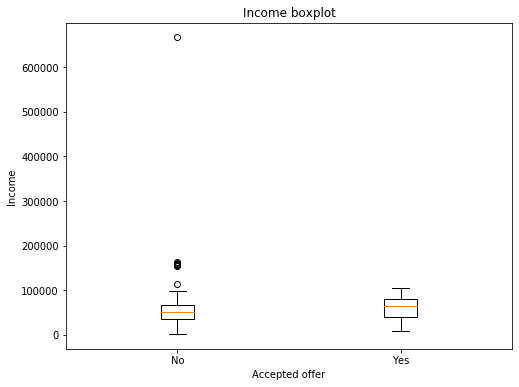

In [11]:
# Plot boxplot
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_data['Income'], pos_data['Income']], labels=['No', 'Yes'])
ax.set_ylabel("Income")
ax.set_xlabel("Accepted offer")
ax.set_title("Income boxplot")

plt.show()

It's very clear in the boxplot above that there are some outliers in data. Let's deal with this outliers using the interquantile method.

In [12]:
# Drop the missing values
pos_income = pos_data['Income']
neg_income = neg_data['Income']

# Define interquantile ranges
iqr_pos_income = pos_data['Income'].quantile(0.75) - pos_data['Income'].quantile(0.25)
iqr_neg_income = neg_data['Income'].quantile(0.75) - neg_data['Income'].quantile(0.25)

# Remove outliers
pos_income = pos_income[(pos_income > pos_income.quantile(0.25) -  1.5*iqr_pos_income) & 
                        (pos_income < pos_income.quantile(0.75) +  1.5*iqr_pos_income)]

neg_income = neg_income[(neg_income > neg_income.quantile(0.25) -  1.5*iqr_neg_income) & 
                        (neg_income < neg_income.quantile(0.75) +  1.5*iqr_neg_income)]

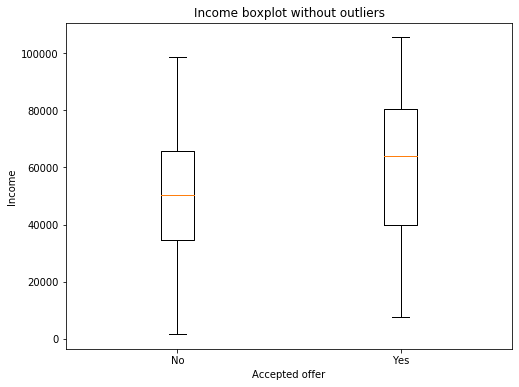

In [13]:
# Plot boxplot without outliers
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_income, pos_income], labels=['No', 'Yes'])
ax.set_ylabel("Income")
ax.set_xlabel("Accepted offer")
ax.set_title("Income boxplot without outliers")

plt.show()

The boxplot above confirms that the average income for customer who accepted the offer is higher than customers who did not.

Just to have a different view of the distributions, let's plot the histograms.

In [14]:
def best_fit_line(mu, sigma, bins):
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    
    return y

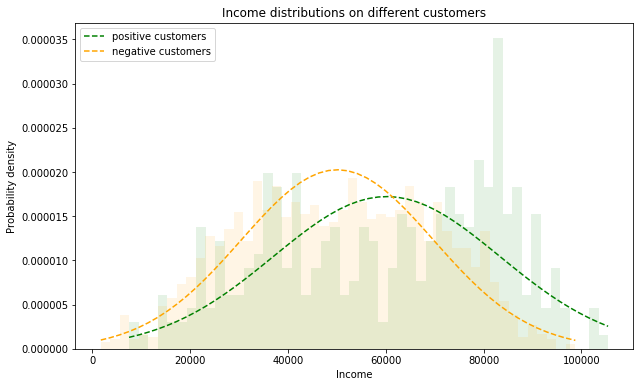

In [15]:
# Plot the distributions for both customer groups
fig, ax = plt.subplots(figsize=(10,6))

# Distribution for positive customers
n, bins, patches = ax.hist(pos_income, 50, density=True, alpha=0.1, color='green')

y = best_fit_line(pos_income.mean(), pos_income.std(), bins)
ax.plot(bins, y, '--', color='green', label='positive customers')

# Distribution for negative customers
n, bins, patches = ax.hist(neg_income, 50, density=True, alpha=0.1, color='orange')

y = best_fit_line(neg_income.mean(), neg_income.std(), bins)
ax.plot(bins, y, '--', color='orange', label='negative customers')
ax.set_xlabel('Income')
ax.set_ylabel('Probability density')

ax.legend()
ax.set_title('Income distributions on different customers')

plt.show()

There is a clearer view in the graph above that both distributions are actually different. The distribution for the positive customers (customers that bought the new gadget) is shifted to the right in relation to the distribution for the negative customers. It is also possible to see that there is a peak of high income customers for the positive cases.

To give a statistical confirmation that these two samples are different, let's use Kolmogorov-Smirnov (KS) test. 

In [16]:
from scipy import stats

In [17]:
stats.ks_2samp(pos_income, neg_income)

Ks_2sampResult(statistic=0.24939946148819914, pvalue=4.440892098500626e-15)

Since the p-value is lower than the level of significance (I'm using alpha=0.05), these two samples are actually different. This way we can confirm that customers who accepted the offer and bought the new gadget have a higher income than those customer who did not.

However, **Income** seems to be a sensible information. It was indeed the only variable that presented missing values, because it is not every customer that feels comfortable to share this information. So let's check if there are some other variables that are correlated to income, so we can understand customer behaviour without having to ask for a sensible data like this one.

Reading the meta-data table in the case file, I selected some variables that might have a correlation with **Income**.

In [18]:
# Columns that might have a correlation with Income
corr_income_variables = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [19]:
# Remove outliers
# Define interquantile range
q1_income = pilot_data['Income'].quantile(0.25)
q3_income = pilot_data['Income'].quantile(0.75)
iqr_income = q3_income - q1_income

corr_matrix_income = pilot_data[
    (pilot_data['Income'] > q1_income - 1.5*iqr_income) & 
    (pilot_data['Income'] < q3_income + 1.5*iqr_income)]

Let's plot a correlation matrix and check the Pearson's R statistic for these variables.

In [20]:
import seaborn as sns

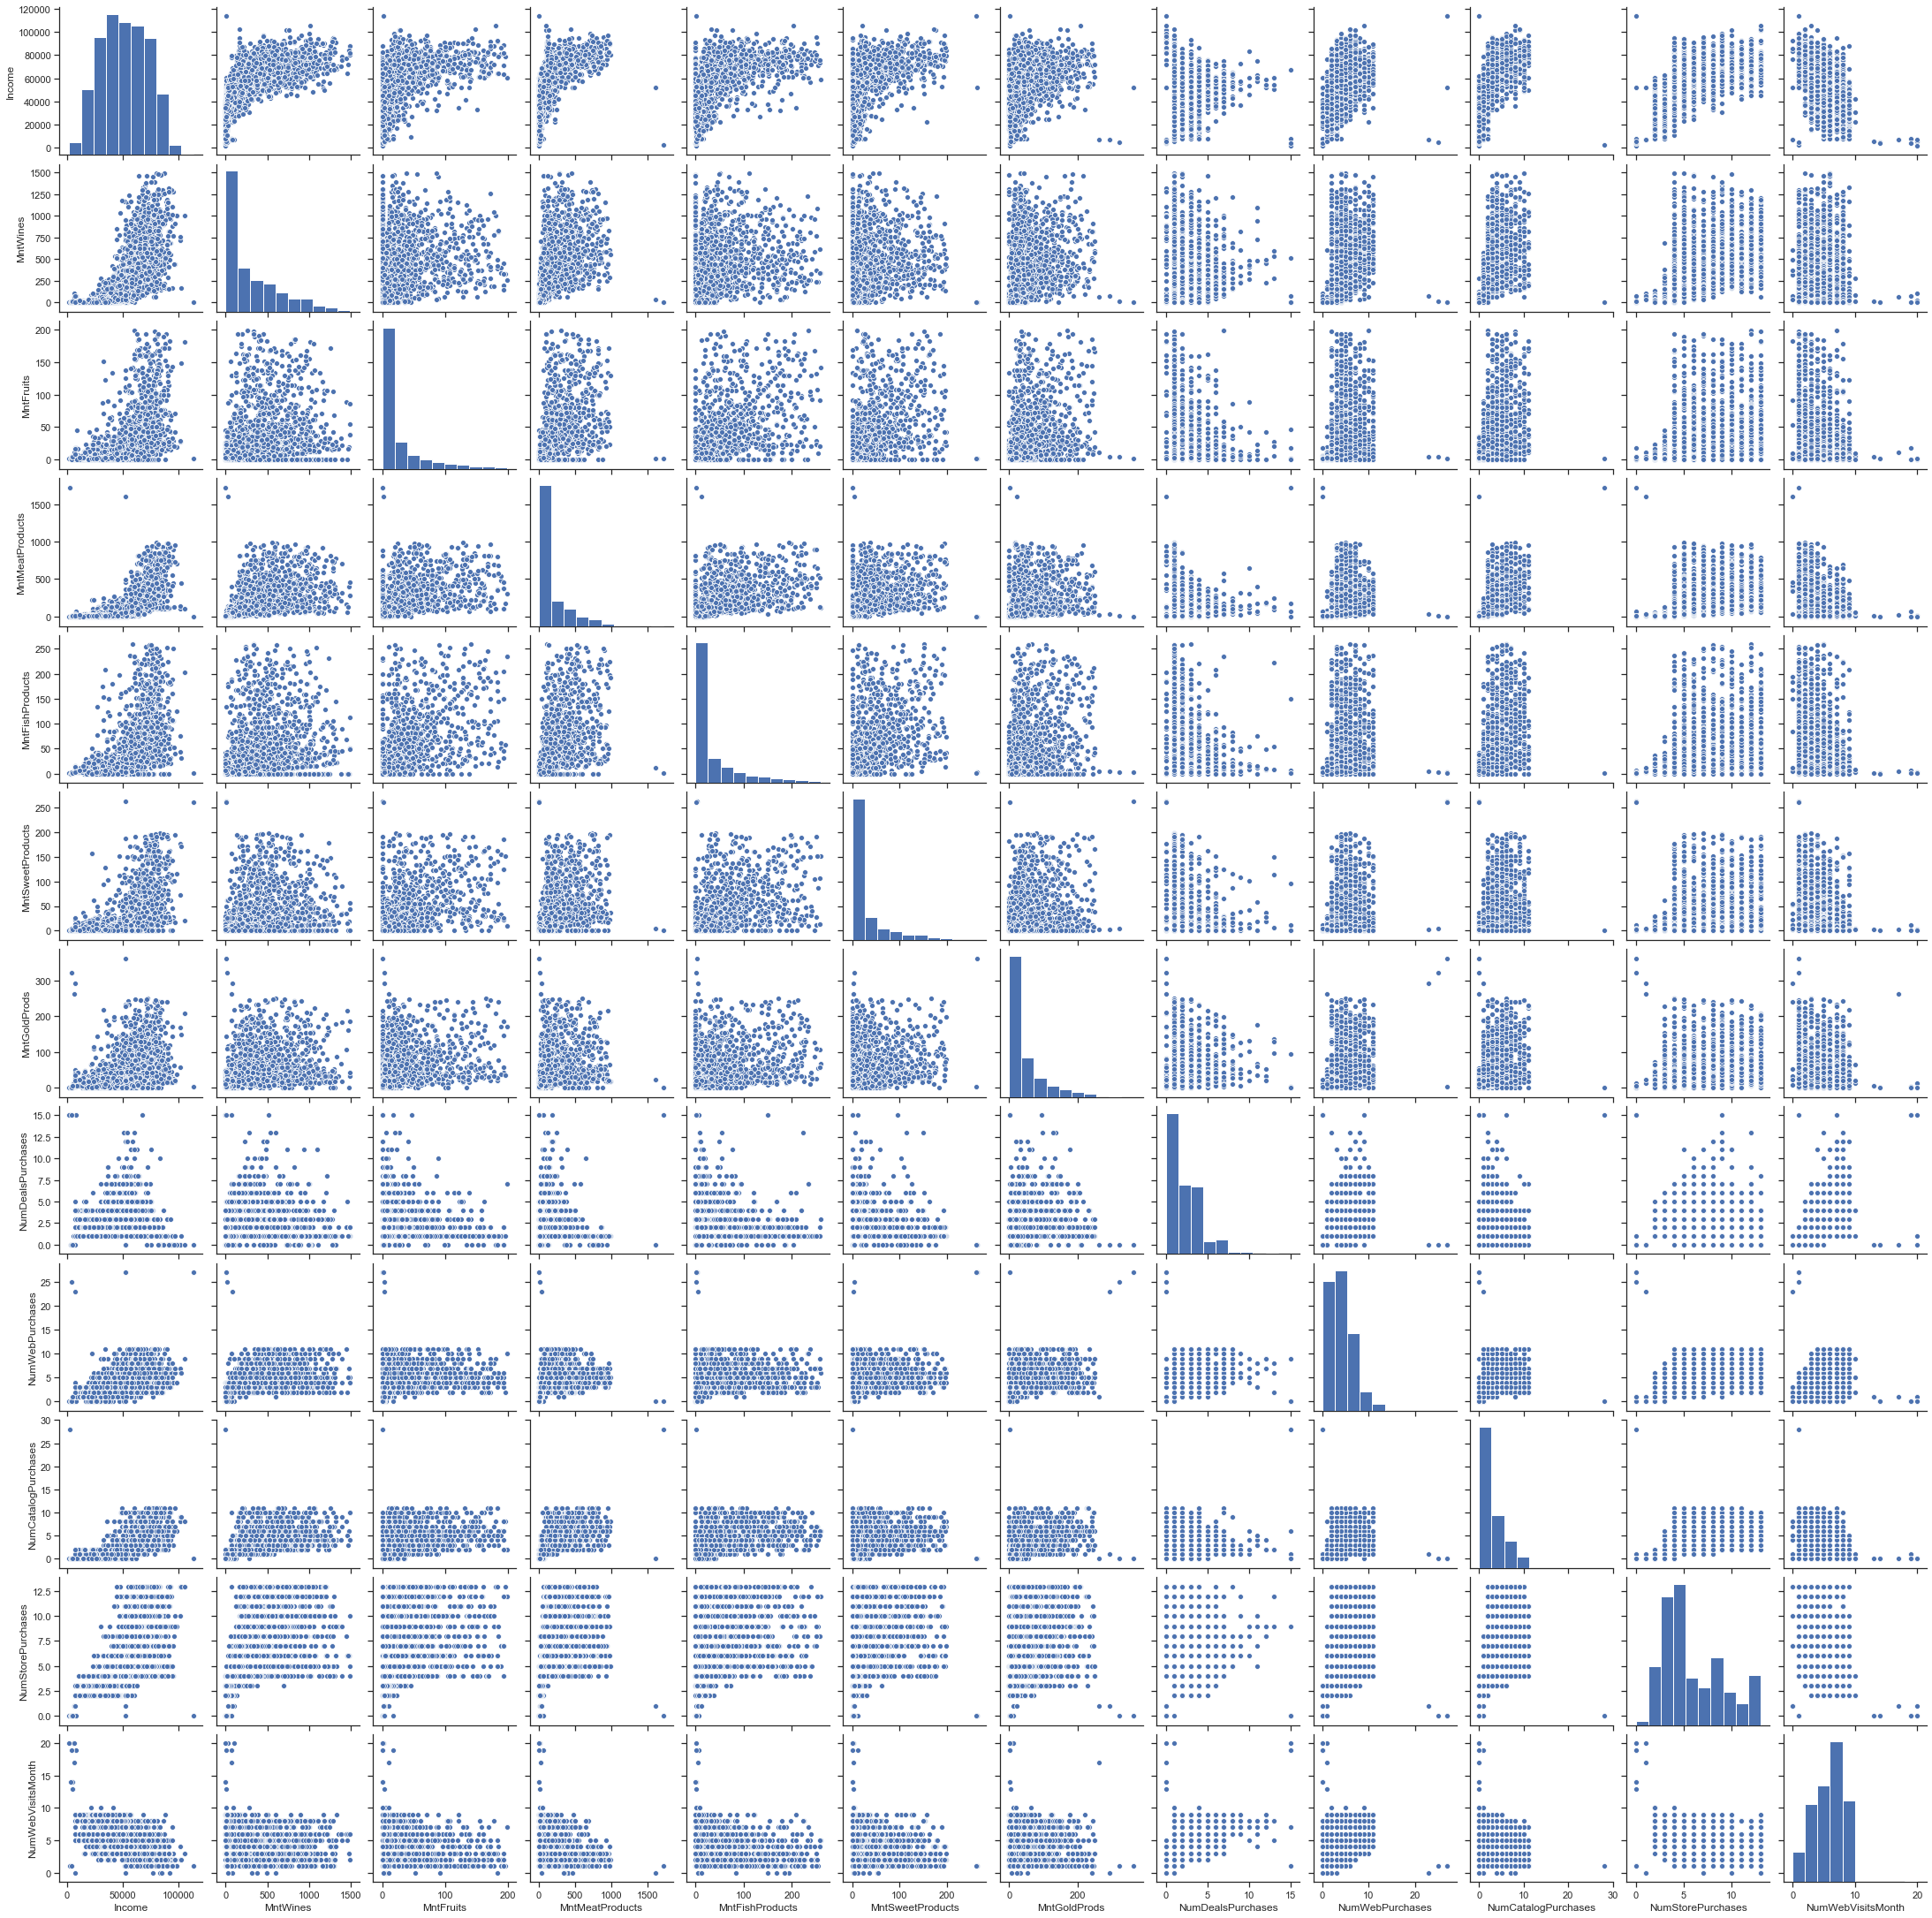

In [22]:
sns.set(style="ticks")

sns.pairplot(corr_matrix_income[corr_income_variables])

In [23]:
corr_matrix_income[corr_income_variables].corr(method='pearson')

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Income,1.000000,0.728020,0.535837,0.693954,0.550238,0.549943,0.413499,-0.131303,0.493069,0.706688,0.682147,-0.644793
MntWines,0.728020,1.000000,0.388714,0.586803,0.398706,0.385477,0.386125,0.014020,0.540877,0.673806,0.641156,-0.328249
MntFruits,0.535837,0.388714,1.000000,0.563786,0.594308,0.566655,0.392104,-0.134085,0.295219,0.515792,0.460927,-0.424982
MntMeatProducts,0.693954,0.586803,0.563786,1.000000,0.590312,0.544750,0.367825,-0.165584,0.315160,0.704037,0.509449,-0.543495
MntFishProducts,0.550238,0.398706,0.594308,0.590312,1.000000,0.579301,0.421922,-0.140938,0.291975,0.565151,0.458785,-0.453065
MntSweetProducts,0.549943,0.385477,0.566655,0.544750,0.579301,1.000000,0.368651,-0.120717,0.347020,0.520101,0.447598,-0.430234
MntGoldProds,0.413499,0.386125,0.392104,0.367825,0.421922,0.368651,1.000000,0.053045,0.419980,0.466453,0.379420,-0.257616
NumDealsPurchases,-0.131303,0.014020,-0.134085,-0.165584,-0.140938,-0.120717,0.053045,1.000000,0.245189,-0.054045,0.076264,0.365228
NumWebPurchases,0.493069,0.540877,0.295219,0.315160,0.291975,0.347020,0.419980,0.245189,1.000000,0.411674,0.499030,-0.065430
NumCatalogPurchases,0.706688,0.673806,0.515792,0.704037,0.565151,0.520101,0.466453,-0.054045,0.411674,1.000000,0.561571,-0.528794


It's possible to see here that the amount spent on products have a mild positive correlation to income. Which means that people with a higher income, spends more on products.

Let's check the difference of total amount spent on products between positive and negative customers.

In [24]:
# Create MntTotalProducts variable, which is total amount spent on products
pos_data['MntTotalProducts'] = pos_data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                         'MntFishProducts', 'MntSweetProducts']].sum(axis=1)
neg_data['MntTotalProducts'] = neg_data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                         'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

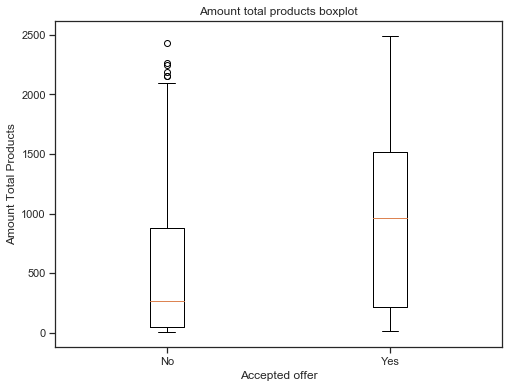

In [25]:
# Plot boxplot
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_data['MntTotalProducts'], pos_data['MntTotalProducts']], labels=['No', 'Yes'])
ax.set_ylabel("Amount Total Products")
ax.set_xlabel("Accepted offer")
ax.set_title("Amount total products boxplot")

plt.show()

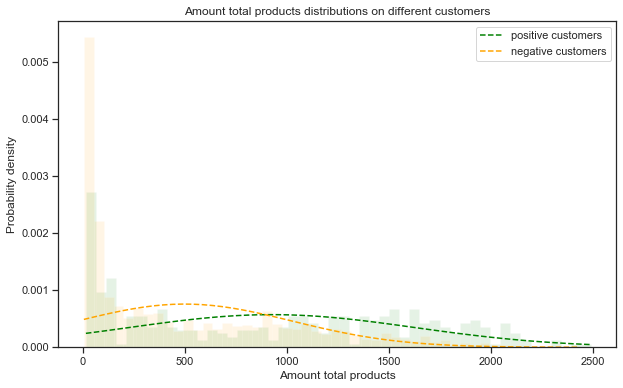

In [26]:
# Plot the distributions for both customer groups
fig, ax = plt.subplots(figsize=(10,6))

# Distribution for positive customers
n, bins, patches = ax.hist(pos_data['MntTotalProducts'], 50, density=True, alpha=0.1, color='green')

y = best_fit_line(pos_data['MntTotalProducts'].mean(), pos_data['MntTotalProducts'].std(), bins)
ax.plot(bins, y, '--', color='green', label='positive customers')

# Distribution for negative customers
n, bins, patches = ax.hist(neg_data['MntTotalProducts'], 50, density=True, alpha=0.1, color='orange')

y = best_fit_line(neg_data['MntTotalProducts'].mean(), neg_data['MntTotalProducts'].std(), bins)
ax.plot(bins, y, '--', color='orange', label='negative customers')
ax.set_xlabel('Amount total products')
ax.set_ylabel('Probability density')

ax.legend()
ax.set_title('Amount total products distributions on different customers')

plt.show()

In [27]:
stats.ks_2samp(pos_data['MntTotalProducts'], neg_data['MntTotalProducts'])

Ks_2sampResult(statistic=0.30386865304019456, pvalue=3.552713678800501e-15)

It's possible to see that customers who accepted the offer are willing to spend more on products: specially wine and meat (that have a high correlation to income). This is an easier way to understand customer behaviour than using a sensible information like income.

In [28]:
# Create MntTotalProducts variable, which is total amount spent on products
pos_data['NumTotalPurchases'] = pos_data[['NumWebPurchases', 'NumCatalogPurchases', 
                                          'NumStorePurchases']].sum(axis=1)
neg_data['NumTotalPurchases'] = neg_data[['NumWebPurchases', 'NumCatalogPurchases', 
                                          'NumStorePurchases']].sum(axis=1)

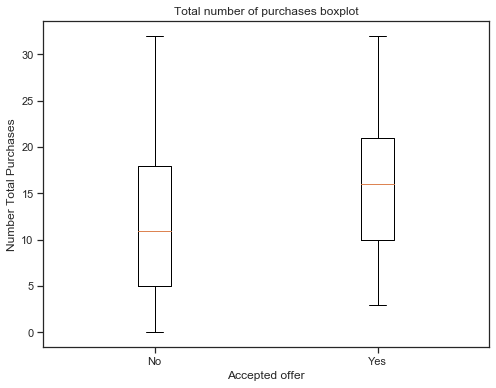

In [29]:
# Plot boxplot
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_data['NumTotalPurchases'], pos_data['NumTotalPurchases']], labels=['No', 'Yes'])
ax.set_ylabel("Number Total Purchases")
ax.set_xlabel("Accepted offer")
ax.set_title("Total number of purchases boxplot")

plt.show()

It is also possible to see that customers who accepted the offer have a higher number of total purchases than those who do not.

### Recency
Another variable that seems really different by the summaries is recency, which is the number of days since the last purchase. Let's explore this as we did for income.

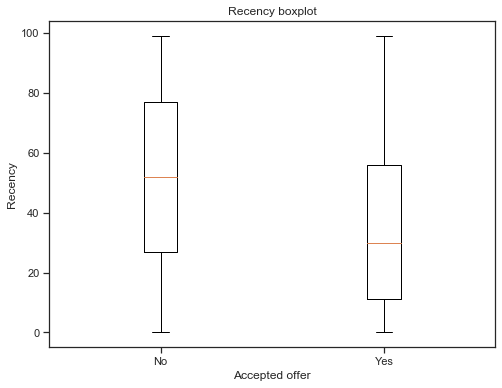

In [30]:
# Plot boxplot
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_data['Recency'], pos_data['Recency']], labels=['No', 'Yes'])
ax.set_ylabel("Recency")
ax.set_xlabel("Accepted offer")
ax.set_title("Recency boxplot")

plt.show()

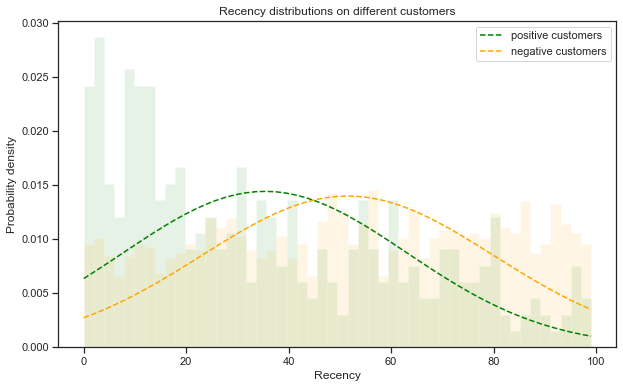

In [31]:
# Plot the distributions for both customer groups
fig, ax = plt.subplots(figsize=(10,6))

# Distribution for positive customers
n, bins, patches = ax.hist(pos_data['Recency'], 50, density=True, alpha=0.1, color='green')

y = best_fit_line(pos_data['Recency'].mean(), pos_data['Recency'].std(), bins)
ax.plot(bins, y, '--', color='green', label='positive customers')

# Distribution for negative customers
n, bins, patches = ax.hist(neg_data['Recency'], 50, density=True, alpha=0.1, color='orange')

y = best_fit_line(neg_data['Recency'].mean(), neg_data['Recency'].std(), bins)
ax.plot(bins, y, '--', color='orange', label='negative customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Probability density')

ax.legend()
ax.set_title('Recency distributions on different customers')

plt.show()

In [32]:
stats.ks_2samp(pos_data['Recency'], neg_data['Recency'])

Ks_2sampResult(statistic=0.2504633963971323, pvalue=4.3298697960381105e-15)

By the boxplot and the histograms it is very clear that customers that accepted the offer have a lower recency in comparison with those who did not accept it. In fact, the histogram for positive customers have a peak on rencency between 0 and 20 days. The KS test confirms that these two distributions are actually different.

### Children at home
Another variable that looks different between customers is **Kidhome** and **Teenhome**. Let's understand if the fact that the customer has children impacts on the campaign.

In [33]:
# Create HasChildren variable
#  1 if the customer has children at home
#  0 if the customer does not have children at home
pos_data['HasChildren'] = pos_data[['Kidhome', 'Teenhome']].apply(lambda row: 
                                                                  bool(row['Kidhome']) | bool(row['Teenhome']), 
                                                                  axis=1)
neg_data['HasChildren'] = neg_data[['Kidhome', 'Teenhome']].apply(lambda row: 
                                                                  bool(row['Kidhome']) | bool(row['Teenhome']), 
                                                                  axis=1)

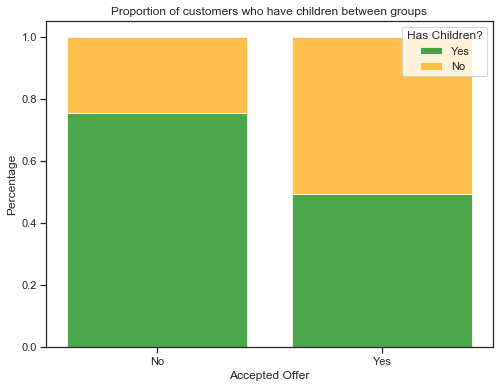

In [34]:
# Plot percentage stacked bar
fig, ax = plt.subplots(figsize=(8,6))

true_children = [neg_data[neg_data['HasChildren'] == True].shape[0]/neg_data.shape[0], 
                 pos_data[pos_data['HasChildren'] == True].shape[0]/pos_data.shape[0]]

false_children = [neg_data[neg_data['HasChildren'] == False].shape[0]/neg_data.shape[0], 
                  pos_data[pos_data['HasChildren'] == False].shape[0]/pos_data.shape[0]]

ind = ['No', 'Yes']

p1 = plt.bar(ind, true_children, color='green', alpha=0.7)
p2 = plt.bar(ind, false_children, bottom=true_children, color='orange', alpha=0.7)

plt.ylabel('Percentage')
plt.xlabel('Accepted Offer')
plt.title('Proportion of customers who have children between groups')
plt.legend(('Yes', 'No'), title='Has Children?')

plt.show()

As we can see, there is a smaller proportion of customer who have children in the group who accepted the offer than in the group who did not. However, almost 50% of customer who have children bought the new gadget. So it does not look like it is a good metric to understand clients behaviour. 

### Marital Status

One of the categorical variables in this data set is **Marital**, which indicates the customer's marital status. Let's understand if there are any insights when exploring this variable.

The values of **Marital** are the following.

In [35]:
print("Marital status: \n{}".format(list(pilot_data['Marital_Status'].unique())))

Marital status: 
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']


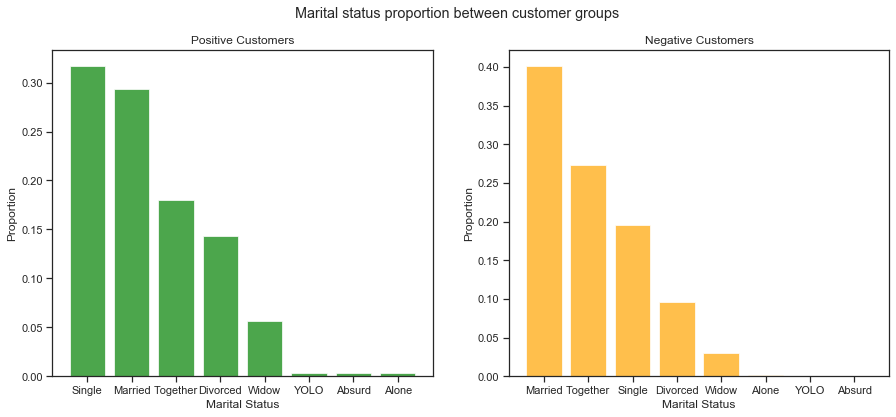

In [36]:
# Plot bar charts
plt.figure(figsize=(15, 6))

plt.subplot(121)
marital_count = pos_data['Marital_Status'].value_counts()
plt.bar(list(marital_count.index), 
        marital_count.values/pos_data.shape[0], color='green', alpha=0.7)
plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.title('Positive Customers')

plt.subplot(122)
marital_count = neg_data['Marital_Status'].value_counts()
plt.bar(list(marital_count.index), 
        marital_count.values/neg_data.shape[0], color='orange', alpha=0.7)
plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.title('Negative Customers')

plt.suptitle('Marital status proportion between customer groups')

plt.show()

As we can see above, there is not a very drastic difference between the two groups of customers, perhaps in the proportion of Single and Married customers. In positive customers, more than 30% are single, while in negative, this number is around 20%. Married customers represent around 30% in positive customers, and 40% on negative ones.

Even though the proportion of single customers is lower in customers who did not accept the offer, targeting this customers only may not be the right strategy, since it still represents 20% of this segment.

### Education
Another categorical variable in our data is **Education**, which indicates the customer's level of education.

In [37]:
print("Education: \n{}".format(list(pilot_data['Education'].unique())))

Education: 
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']


Let's see the proportions of educational level on each group of customers.

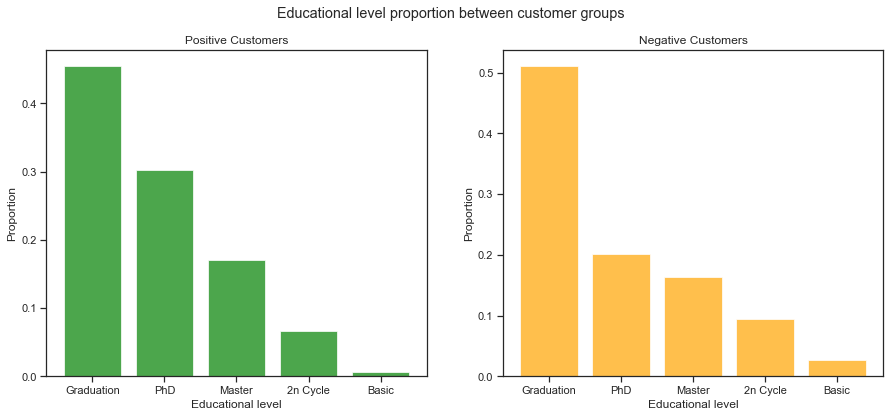

In [38]:
# Plot bar charts
plt.figure(figsize=(15, 6))

plt.subplot(121)
education_count = pos_data['Education'].value_counts()
plt.bar(list(education_count.index), 
        education_count.values/pos_data.shape[0], color='green', alpha=0.7)
plt.ylabel('Proportion')
plt.xlabel('Educational level')
plt.title('Positive Customers')

plt.subplot(122)
education_count = neg_data['Education'].value_counts()
plt.bar(list(education_count.index), 
        education_count.values/neg_data.shape[0], color='orange', alpha=0.7)
plt.ylabel('Proportion')
plt.xlabel('Educational level')
plt.title('Negative Customers')

plt.suptitle('Educational level proportion between customer groups')

plt.show()

It's funny to see that negative customers have a high number of customers with a high level of education. That because one of my hypothesis was that customers with higher level of educational, have a higher income, and then are more willing to buy the new gadget.

However, this is what we see when we plot the average income for different educational levels for positive and negative customers.

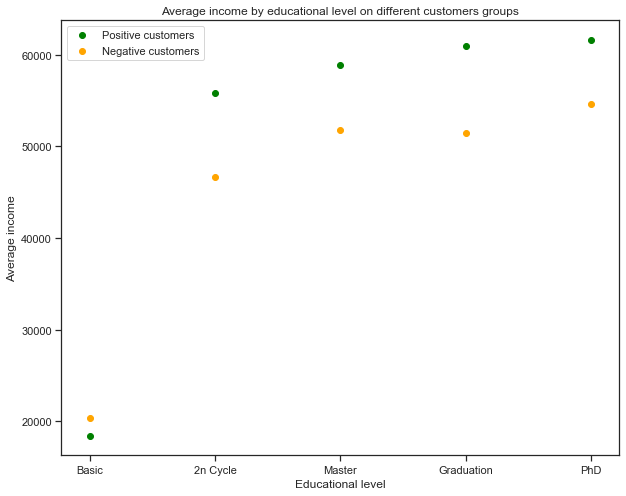

In [39]:
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10,8))

educational_mean = pos_data[['Education', 'Income']].groupby('Education').mean().sort_values(by='Income')
ax.scatter(educational_mean.index, educational_mean.values, color='green', label='Positive customers')

educational_mean = neg_data[['Education', 'Income']].groupby('Education').mean().sort_values(by='Income')
ax.scatter(educational_mean.index, educational_mean.values, color='orange', label='Negative customers')

ax.set_ylabel('Average income')
ax.set_xlabel('Educational level')
ax.set_title('Average income by educational level on different customers groups')
ax.legend()
plt.show()

As we can see in the graph above, even though there is a high proportion of highly educated customers in the negative group, these individuals have a lower income than customers with a high educational level in the positive group.

So the hypothesis that customers with a higher income are more willing to buy the new gadget is still true, despite the educational level.

### Customer's enrollment time
Another categorical feature in our data is **Dt_Customer**, which represents the date of customer's enrollment with the company. This data seems to be a little outdated, since the maximum enrollment date is on 2014-06-29, or maybe the company is already targeted to older customers. However, let's still do some investigation on this data.

The first thing, is to transform this feature in a continuous variable, so the visualization is easier. Let's create the variable **EnrollmentTime** which represent the number of days the customer is enrolled with the company.

In [40]:
from datetime import datetime

In [41]:
# Create variable EnrollmentTime to represent the number of days the customer's enrolled with the company up to now
pos_data['EnrollmentTime'] = pos_data['Dt_Customer'].map(
    lambda x: (datetime.now() - datetime.strptime(x, '%Y-%m-%d')).days)

neg_data['EnrollmentTime'] = neg_data['Dt_Customer'].map(
    lambda x: (datetime.now() - datetime.strptime(x, '%Y-%m-%d')).days)

Let's now understand the distributions of this variable for both customer groups.

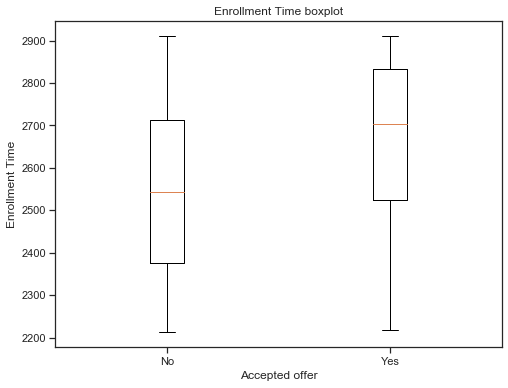

In [42]:
# Plot boxplot
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot([neg_data['EnrollmentTime'], pos_data['EnrollmentTime']], labels=['No', 'Yes'])
ax.set_ylabel("Enrollment Time")
ax.set_xlabel("Accepted offer")
ax.set_title("Enrollment Time boxplot")

plt.show()

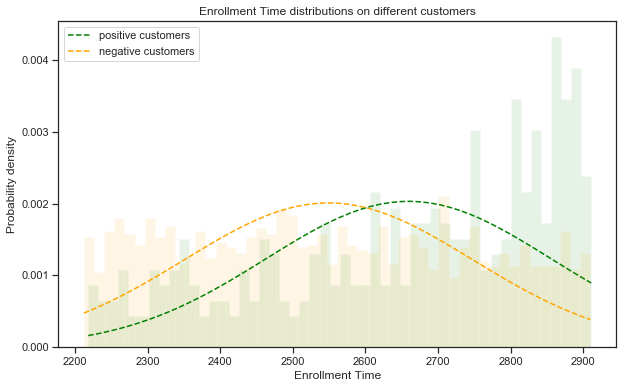

In [43]:
# Plot the distributions for both customer groups
fig, ax = plt.subplots(figsize=(10,6))

# Distribution for positive customers
n, bins, patches = ax.hist(pos_data['EnrollmentTime'], 50, density=True, alpha=0.1, color='green')

y = best_fit_line(pos_data['EnrollmentTime'].mean(), pos_data['EnrollmentTime'].std(), bins)
ax.plot(bins, y, '--', color='green', label='positive customers')

# Distribution for negative customers
n, bins, patches = ax.hist(neg_data['EnrollmentTime'], 50, density=True, alpha=0.1, color='orange')

y = best_fit_line(neg_data['EnrollmentTime'].mean(), neg_data['EnrollmentTime'].std(), bins)
ax.plot(bins, y, '--', color='orange', label='negative customers')
ax.set_xlabel('Enrollment Time')
ax.set_ylabel('Probability density')

ax.legend()
ax.set_title('Enrollment Time distributions on different customers')

plt.show()

In [44]:
stats.ks_2samp(pos_data['EnrollmentTime'], neg_data['EnrollmentTime'])

Ks_2sampResult(statistic=0.2535830751927415, pvalue=3.9968028886505635e-15)

It seems that the higher the customer's enrollment time, the more willing the customer is to accept the offer. In the histograms it is possible to see that there is a peak of customers with enrollment time bigger than 2700 days.

### Complaint
**Complain** is a binary variable that states if the customer complained in the last two years. In the summaries we constructed at the beginning of this section it is possible to see that most customers did not complain, so this feature might not bring us any insight.

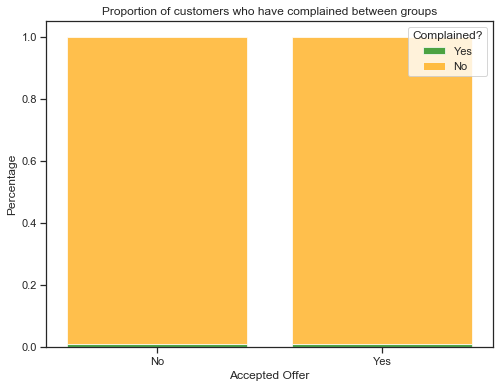

In [45]:
# Plot percentage stacked bar
fig, ax = plt.subplots(figsize=(8,6))

true_complain = [neg_data[neg_data['Complain'] == 1].shape[0]/neg_data.shape[0], 
                 pos_data[pos_data['Complain'] == 1].shape[0]/pos_data.shape[0]]

false_complain = [neg_data[neg_data['Complain'] == 0].shape[0]/neg_data.shape[0], 
                  pos_data[pos_data['Complain'] == 0].shape[0]/pos_data.shape[0]]

ind = ['No', 'Yes']

p1 = plt.bar(ind, true_complain, color='green', alpha=0.7)
p2 = plt.bar(ind, false_complain, bottom=true_complain, color='orange', alpha=0.7)

plt.ylabel('Percentage')
plt.xlabel('Accepted Offer')
plt.title('Proportion of customers who have complained between groups')
plt.legend(('Yes', 'No'), title='Complained?')

plt.show()

As we expected, no insights were brought with this variable.

### Accepted previous offers
Before this campaign, five others have been made and the information if the customer have accepted them or not are in the variables **AcceptedCmpX**, where X is the number of the campaign.

Analysing the summaries at the beginning of this section, it is possible to see that there is a higher percentage of acceptance of previous offers in the customers who bought the new gadget. Since the mean and percentiles of acceptance in each campaign are low, let's create a boolean variable that represents if the customer accepted any previous offer.

In [46]:
# Create AcceptedAnyCmp variable
#  1 if the customer has accepted any previous offer
#  0 if the customer does not have accepted any previous offer
pos_data['AcceptedAnyCmp'] = pos_data[['AcceptedCmp1', 'AcceptedCmp2', 
                                       'AcceptedCmp3', 'AcceptedCmp4', 
                                       'AcceptedCmp5']].apply(lambda row: row['AcceptedCmp1'] | 
                                                              row['AcceptedCmp2'] | 
                                                              row['AcceptedCmp3'] | 
                                                              row['AcceptedCmp4'] | 
                                                              row['AcceptedCmp5'], axis=1)

neg_data['AcceptedAnyCmp'] = neg_data[['AcceptedCmp1', 'AcceptedCmp2', 
                                       'AcceptedCmp3', 'AcceptedCmp4', 
                                       'AcceptedCmp5']].apply(lambda row: row['AcceptedCmp1'] | 
                                                              row['AcceptedCmp2'] | 
                                                              row['AcceptedCmp3'] | 
                                                              row['AcceptedCmp4'] | 
                                                              row['AcceptedCmp5'], axis=1)

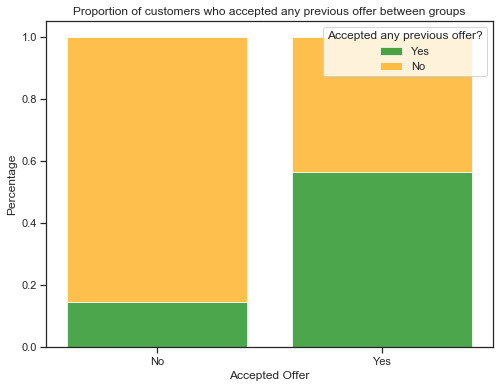

In [47]:
# Plot percentage stacked bar
fig, ax = plt.subplots(figsize=(8,6))

true_acceptedanycmp = [neg_data[neg_data['AcceptedAnyCmp'] == 1].shape[0]/neg_data.shape[0], 
                       pos_data[pos_data['AcceptedAnyCmp'] == 1].shape[0]/pos_data.shape[0]]

false_acceptedanycmp = [neg_data[neg_data['AcceptedAnyCmp'] == 0].shape[0]/neg_data.shape[0], 
                        pos_data[pos_data['AcceptedAnyCmp'] == 0].shape[0]/pos_data.shape[0]]

ind = ['No', 'Yes']

p1 = plt.bar(ind, true_acceptedanycmp, color='green', alpha=0.7)
p2 = plt.bar(ind, false_acceptedanycmp, bottom=true_acceptedanycmp, color='orange', alpha=0.7)

plt.ylabel('Percentage')
plt.xlabel('Accepted Offer')
plt.title('Proportion of customers who accepted any previous offer between groups')
plt.legend(('Yes', 'No'), title='Accepted any previous offer?')

plt.show()

As we can see in the graph above, customers who accepted any previous offer are more willing to buy the new gadget than those who did not, since 60% of positive customers are represented by this group, and less than 20% of negative customer are represented by them.

## Conclusion

After exploring data in-depth it is possible to understand better customers that are willing to accept the offer and buy the new gadget promoted by the campaign.

These customers have a **higher income**, which we understood it is a sensible information, but have a moderate correlation with the amount spent on products and number of purchases made. So we can check for customers with **high amount spent on products** and **high number of purchases**.

Another good information is recency, which is the number of days since the last purchase. These customers usually take around 20 days since the last purchase. Actually, there is a peak in the number of customers who accepted the offer with **recency below 20 days**.

Customers that are more willing to accept the offer also are more time enrolled with the company. Actually, there is a peak in the number of customers who accepted the offer that are **enrolled with the company for more than 2700 days**.

Another interesting information is if the customer has accepted any previous offer, since **60% of these customers accepted at least one previous offer**, while less than 20% of customers who did not buy the new gadget accepted a previous offer.

About marital status, it might be a good idea to check for single customers, but this segment also represents 20% of customers who did not buy the new gadget, so it's not the best clue about customers who might accept the offer.

Not having children is also not the best indicator, since 50% of customers who accepted the offer have children. Even though this proportion is much higher in customers that did not buy the new gadget.

Educational level is also not a good indicator by itself, even though it has a correlation with income. That because there is a high percentage of highly educated customers among those who did not accept the offer. What happens here, is that these customers have a lower income when compared to the customers with the same level of education that did accept the offer. So it is better to segment customers by income here.